# Example usage

To use `pyxplor` in a project:

In [1]:
import pyxplor
from pyxplor.plot_binary import plot_binary
from pyxplor.plot_categorical import plot_categorical
from pyxplor.plot_numeric import plot_numeric
from pyxplor.plot_time_series import plot_time_series

import seaborn as sns
import os

In [2]:
print(pyxplor.__version__)

0.1.0


In [3]:
taxi = sns.load_dataset("taxis")
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## Exploring binary features

We'll start by exploring the binary features in our dataset. In our dataset, we have two binary features, `color` and `payment`. If we want to explore and visualize the distribution of these two binary variables, we can utilize the `plot_binary` function.

In [4]:
taxi.color.value_counts()

color
yellow    5451
green      982
Name: count, dtype: int64

In [5]:
taxi.payment.value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

The current dataset contains null values, so we'll have to drop them first before we apply the `plot_binary` function. This will be updated in a future version as we continue to optimize these functions.

In [6]:
taxi = taxi.dropna()

Now, that we've dropped our null values, we can apply our `plot_binary` function. This function is really simple to use. All the function requires is the dataframe (where the binary variables locate), a list of the binary variables and the plot type (`count` or `pie`). Here's an example.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

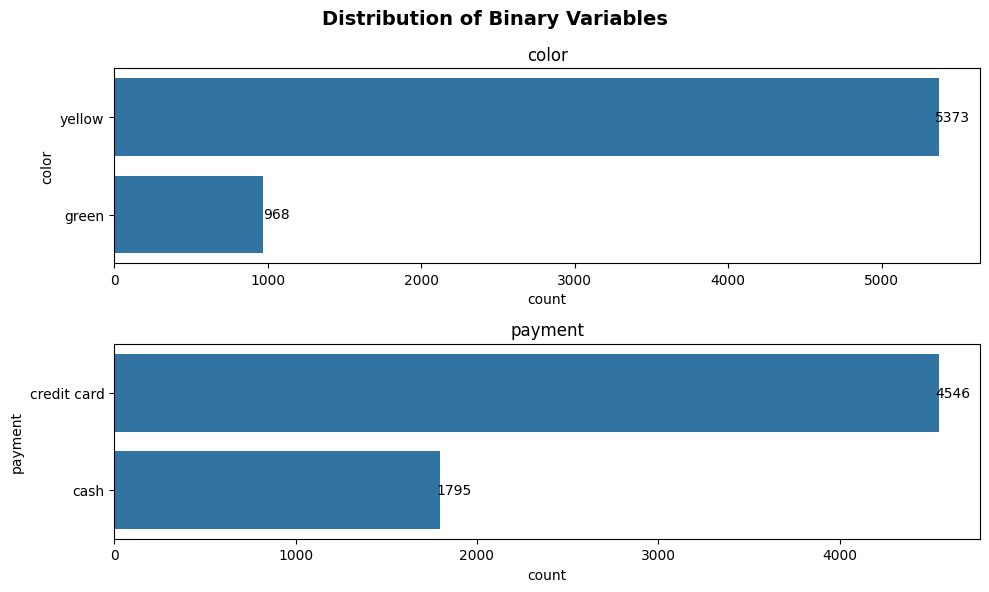

In [7]:
plot_binary(taxi, ['color', 'payment'], 'count')

Ta da! We can see that the function automatically returns the visualization of all of the binary variables specified. The function also adds the labels to the bars automatically, which is a hassle to do in matplotlib. If you prefer visualizing these variables as a pie chart. Just change the parameter of argument `plot_kind` from `count` to `pie`.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'Distribution of color'}>,
        <Axes: title={'center': 'Distribution of payment'}>], dtype=object))

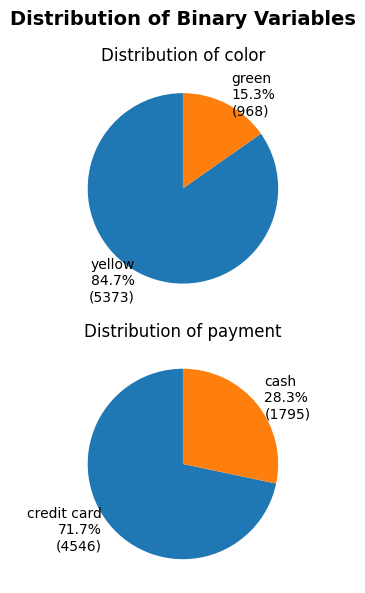

In [8]:
plot_binary(taxi, ['color', 'payment'], 'pie')

Wow! Would you look at that! Now we can even see the percentage of the distribution. Easy right! Next, let's explore the other arguments that will allow you to configure your visualization.

### `label_offset` and `label_fontsize`

The first thing you're allowed to configure is the location and the fontsize of the labels. This is so that you will be allowed to place the labels in a location that you prefer. 

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

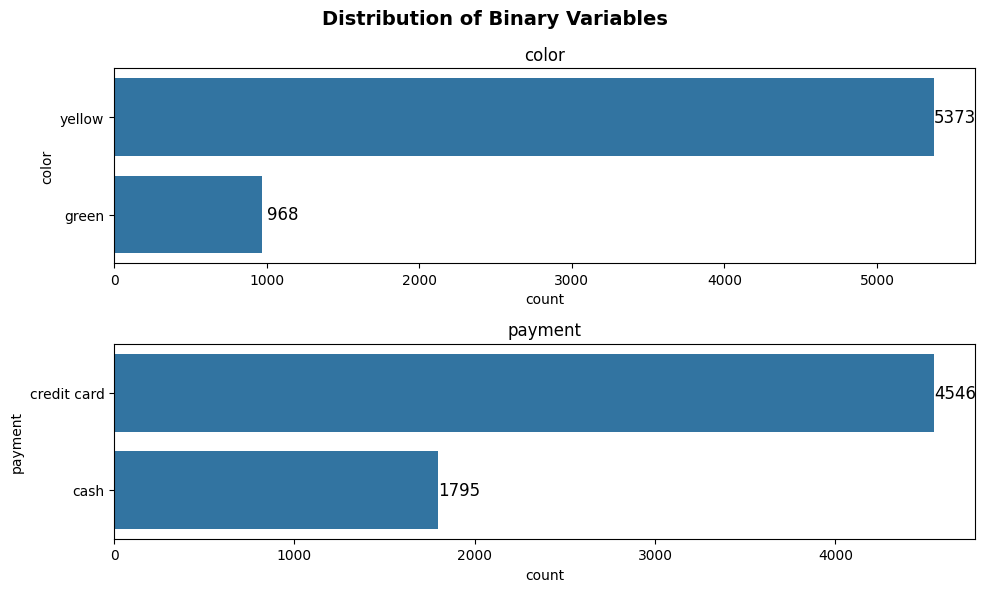

In [9]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = 15, label_fontsize = 12)

Since the default plot orientation (can be modified through argument `plot_orientation`) is horizontal (the bars are horizontal), `label_offset` moves the label to the right if it's positive and moves the label to the left if the it's negative.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

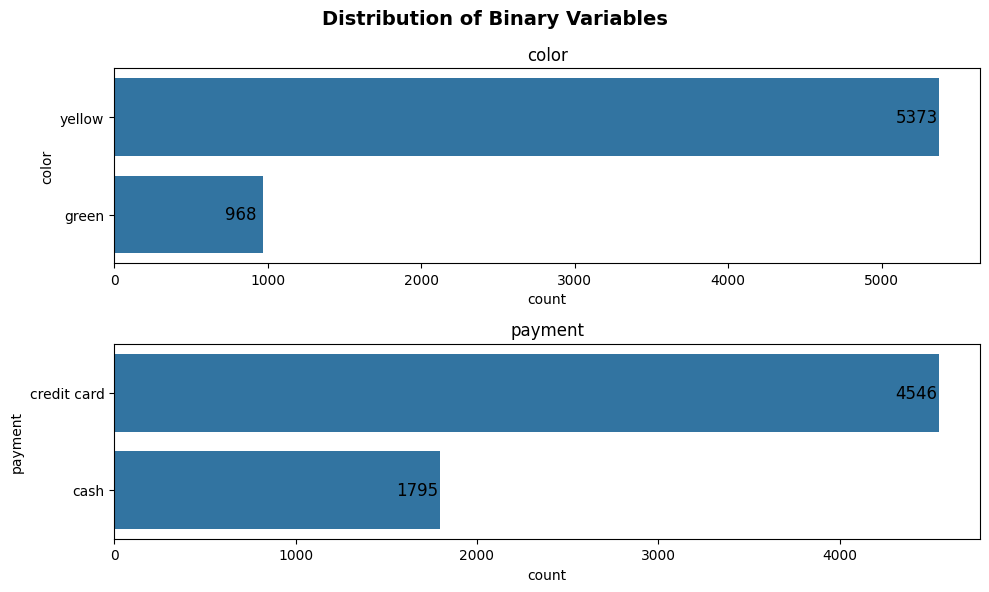

In [10]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = -16, label_fontsize = 12)

Note that `label_offset` and `label_fontsize` will only affect the bar chart. These arguments will not affect the labels of the pie chart. This will be a function that we'll add in the future.

### `plot_orientation`

Just now we mentioned that we can modify the `plot_orinetation` to change how the bars are oriented. `plot_orientation` takes on 2 values, `h` or `v`, which stands for horizontal-orientation and vertical-orientation, respectively. Note that this argument also only applies to the bar chart since there's only one type of orientation for pie charts. Below is an example where we switch the default orientation from `h` to `v`.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='color', ylabel='count'>,
        <Axes: title={'center': 'payment'}, xlabel='payment', ylabel='count'>],
       dtype=object))

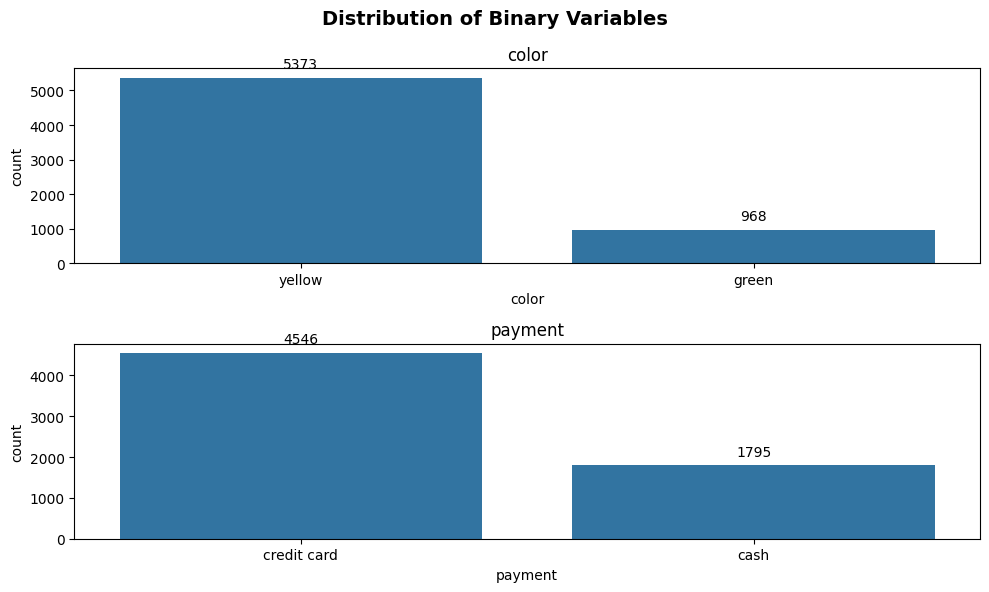

In [11]:
plot_binary(taxi, ['color', 'payment'], 'count', plot_orientation='v')

As we change the orientation from `h` to `v`, the way `label_offset` works also changes. If we set the `label_offset` as a positive value, the labels will go up, whereas if `label_offset` is a negative value, the position will go down.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='color', ylabel='count'>,
        <Axes: title={'center': 'payment'}, xlabel='payment', ylabel='count'>],
       dtype=object))

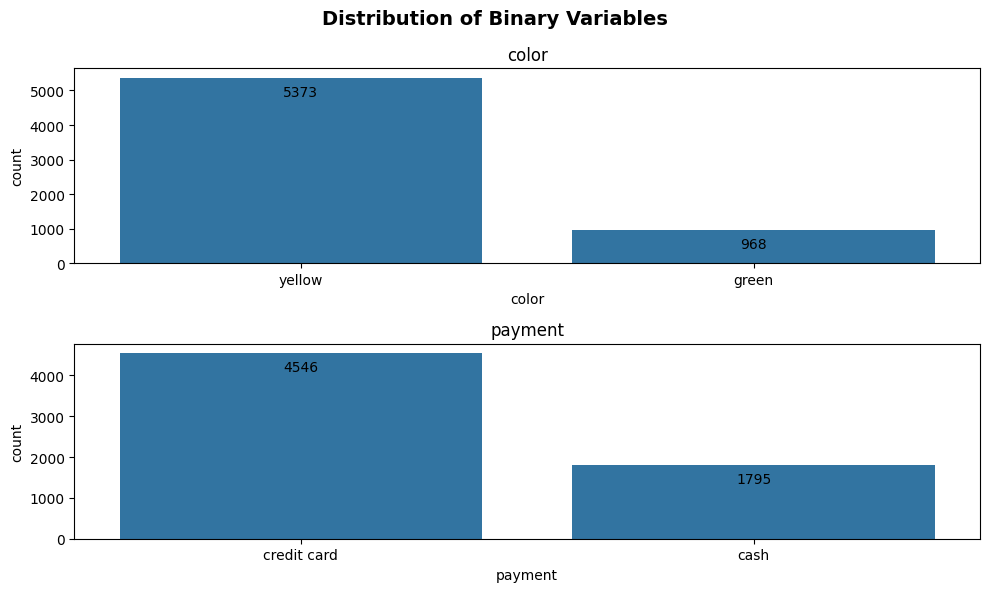

In [12]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = -10, plot_orientation='v')

### `figsize`

So you'll notice that the plot above looks a bit compressed because of the figure shape. Don't worry because you'll be able to modify the figure shape with the argument `figsize`. The argument `figsize` takes in a tuple with two values. The first value is the width of your figure and the second value is the height of your figure. Below is an example as we modify the `figsize` so the plot becomes easier to visualize.

(<Figure size 400x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='color', ylabel='count'>,
        <Axes: title={'center': 'payment'}, xlabel='payment', ylabel='count'>],
       dtype=object))

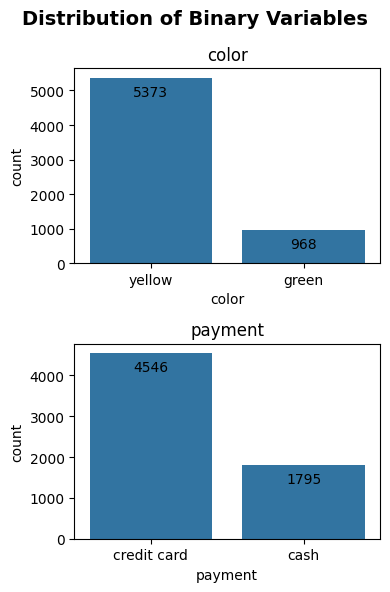

In [13]:
plot_binary(taxi, ['color', 'payment'], 'count', label_offset = -10, plot_orientation='v', figsize=(4, 6))

The plot looks much better now that it's not compressed! Hooray!

### `output`

The next argument is `output`, where we can choose to download the figure for use. This argument takes in a boolean value. The default is `False`, which means that you do not want to download the figure. If you set it as `True`, then it will download the figure to your current path as `binary_variables.png`. 

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

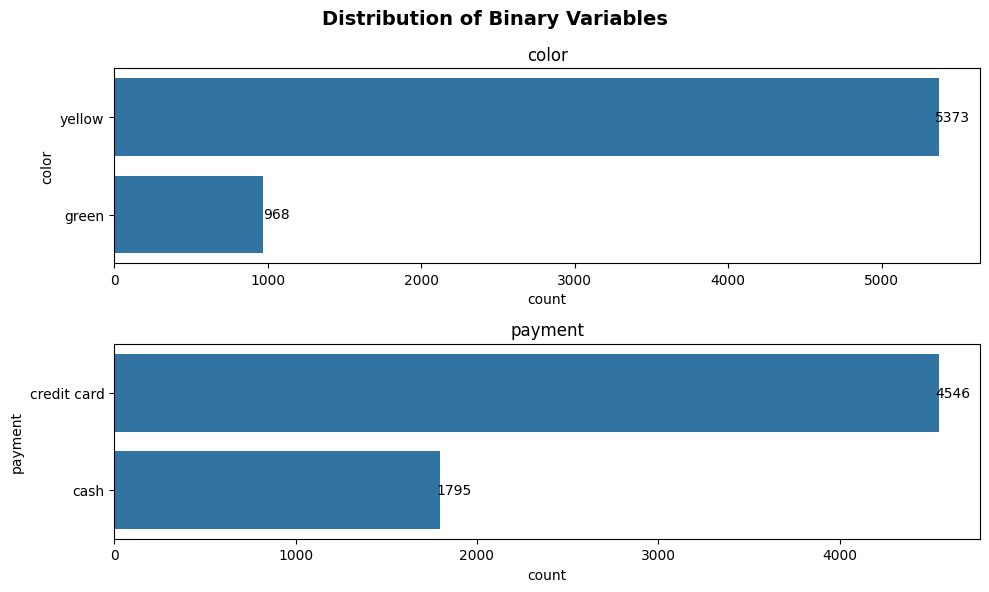

In [14]:
plot_binary(taxi, ['color', 'payment'], 'count', output=True)

If you run the code above, you should notice that the figure is downloaded to the current working directory. We'll remove the figure to clean up the process.

In [15]:
os.remove("binary_variables.png")

### `super_title` and `super_title_font`

Finally, we can modify the super title and its fontsize. The default super title is `Distribution of Binary Variables`. If you have something that you prefer or if you want to change the fontsize of it, you're more than welcome to modify it.

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: title={'center': 'color'}, xlabel='count', ylabel='color'>,
        <Axes: title={'center': 'payment'}, xlabel='count', ylabel='payment'>],
       dtype=object))

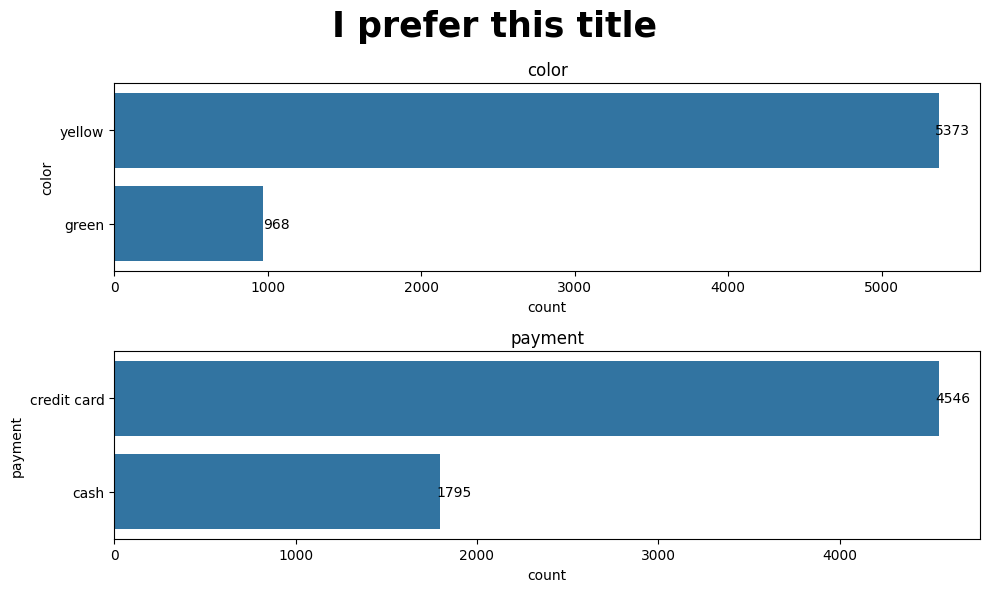

In [16]:
plot_binary(taxi, ['color', 'payment'], 'count', super_title='I prefer this title', super_title_font=25)

As we continue to work on optimizing this function, more flexibility in terms of configuring the appeareance of the plot will be added. Have fun and play around with this function!

## Exploring categorical features

Next, we will explore the categorical features in our dataset using our `plot_categorical` function. Like our `plot_binary` function above, this function allows us to visualize the supplied categorical features as horizontal bar plots. We will explore `plot_categorical`'s functionality further through an example using the features in our `taxi` dataset.

Looking at our `taxi` dataset, we see that `pickup_zone`, `dropoff_zone`, `pickup_borough`, `dropoff_borough` all are nominal features.

In [17]:
len(taxi.pickup_zone.unique()), len(taxi.dropoff_zone.unique())

(194, 203)

We note above that `pickup_zone` and `dropoff_zone` have 194 and 203 unique categories, respectively. 

In [18]:
len(taxi.pickup_borough.unique()), len(taxi.dropoff_borough.unique())

(4, 5)

However, 'pickup_borough' and 'dropoff_borough' are a higher-level of category and only have 4 and 5 unique categories, respectively.

We also note that, by nature of the number of passengers allowed in a car, `passengers` can also be considered a categorical feature. We see below that `passengers` has 7 unique values.

In [19]:
len(taxi.passengers.unique())

7

Now that we have done some preliminary exploration of our categorical features, we can apply the `plot_categorical` function. From the function definition, we note that the only required parameters are our input dataframe (that contains the categorical variables) and our list of categorical variables to be visualized. 

Let's first walk through a simple example with one categorical variable -  `passengers`.

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'passengers'}, xlabel='count'>)

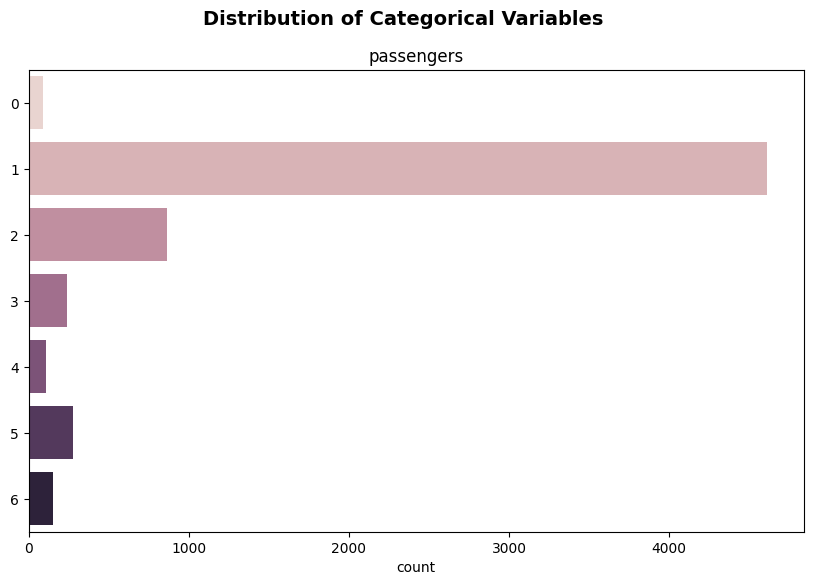

In [20]:
plot_categorical(taxi, ['passengers'])

Although this is a very simple example with a list of just one categorical feature to plot, we can observe some of the plotting behaviour that our `plot_categorical` function automates without adding any of the optional parameters. The function creates a horizontal bar plot for the supplied categorical variables - and distinguishes these categories by color as well.

Now that we've seen the simplest example, let's see what happens when we go to add all of the categorical features we noted above - `pickup_zone`, `dropoff_zone`, `pickup_borough`, `dropoff_borough`.

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1000x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

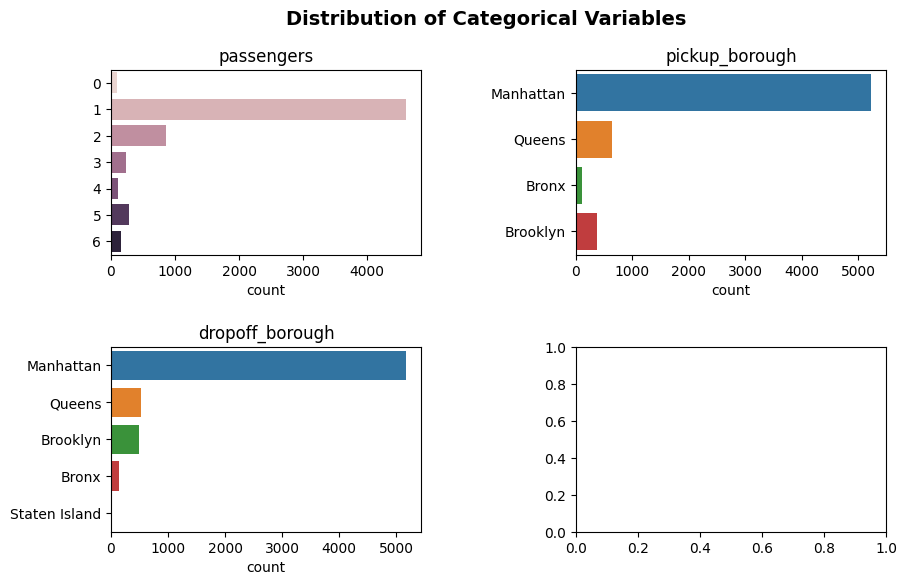

In [21]:
categorical_feats = ['passengers', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']

plot_categorical(taxi, categorical_feats)

Interesting... you may be asking "Why did it only plot three of our categorical features? What happened to `pickup_zone` and `dropoff_zone`?". The answer is that the `plot_categorical` function only plots those categorical variables specified in the list of variables that have 20 or less unique values. As we saw above, `pickup_zone` and `dropoff_zone` have far more unique values than that - 194 and 203, repsectively. Since visualizing that many values on a bar plot would be very crammed and therefore may warrant a separate EDA of its own, `plot_categorical` drops `pickup_zone` and `dropoff_zone`, and returns the following message to indicate that it has done so:

    Only displaying plots for categorical variables with 20 or less unique values.
    Dropping the following variables for plotting: pickup_zone, dropoff_zone
    

From this slightly more complex example, we can see that `plot_categorical` helps us with preliminary EDA for categorical features. We can even use the outputs of this function and go one step further, using the messages that the function returns (like the one above) to tell us which more complex categorical variables may require a more detailed analysis.

Now that we've got the hang of the basics of `plot_categorical`, let's take a look at our optional parameters. Let's see how you can configure your visualiziation and make it your own!

### `yaxis_label_fontsize`

`yaxis_label_fontsize` allows us to configure the font size of the axis labels. The default font size is 10 pts - but that may be a bit small for some people. Let's try increasing this to 15 to try and make our labels more readable!

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1000x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

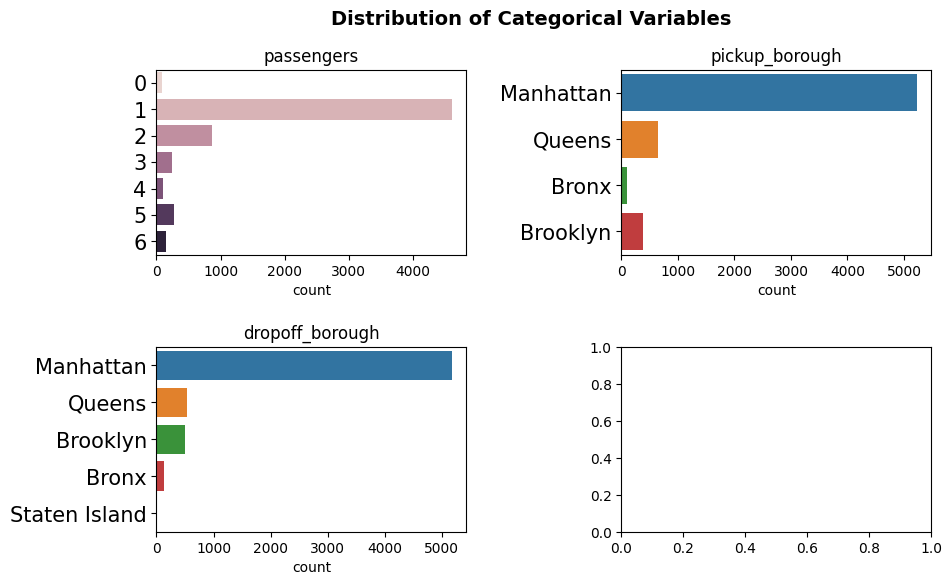

In [22]:
plot_categorical(taxi, categorical_feats, yaxis_label_fontsize=15)

Nice! Now we don't need our glasses to read the categories!

Take note also that the y-axis label font size configuration does not apply to our empty plot (which appears as we have an uneven number of sublots in our grid).

### `padding`

 We can use the `padding` parameter to increase or decrease the space between subplots (noting that the `padding` value is expressed as a fraction of the average Axes height). The `padding` parameter is a tuple of two numerical values - where the first element represents the height padding and the second represents the width padding. 
 
 Looking at our most recent figure, we see that after increasing the fontsize of our y-axis label, we now are running into the aesthetic problem that the beginning of our y-axis labels are very close to the edge of the subplot to it's side. Let's try increasing the width spacing to 0.75 (while keeping the height spacing at the default value of 0.5) to avoid any confusion with labeling.

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1000x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

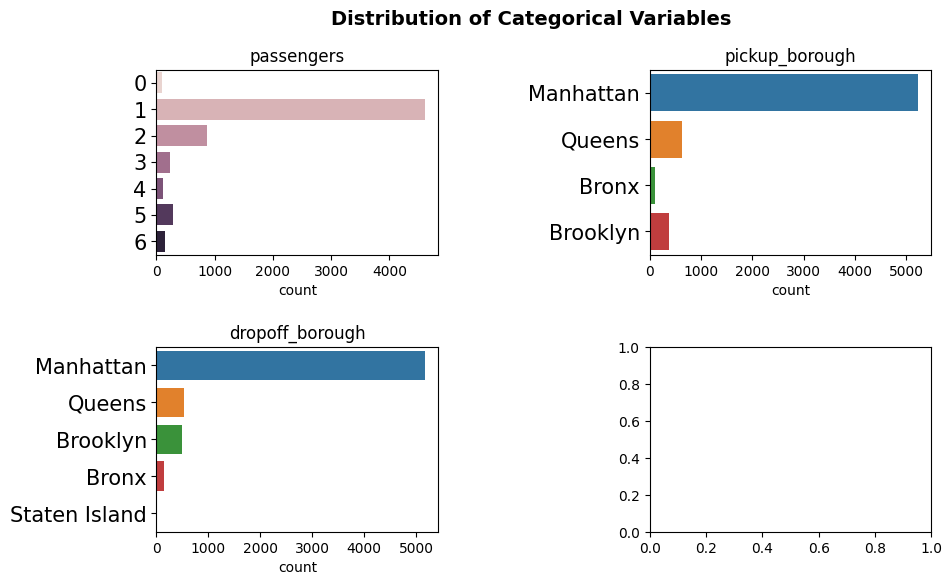

In [23]:
plot_categorical(taxi, categorical_feats, yaxis_label_fontsize=15, padding=(0.5, 0.75))

### `figsize`

Like with `plot_binary`, we can modify the figure dimensions using the `figsize` parameter. `figsize` is a tuple of two numeric values - the width and height of the figure (with the default being a width of 10 and a height of 6). 

Let's go back to our default inputs for `yaxis_label_fontsize` and `padding`, but increasing the width to get more granular into the count scale!

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1500x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

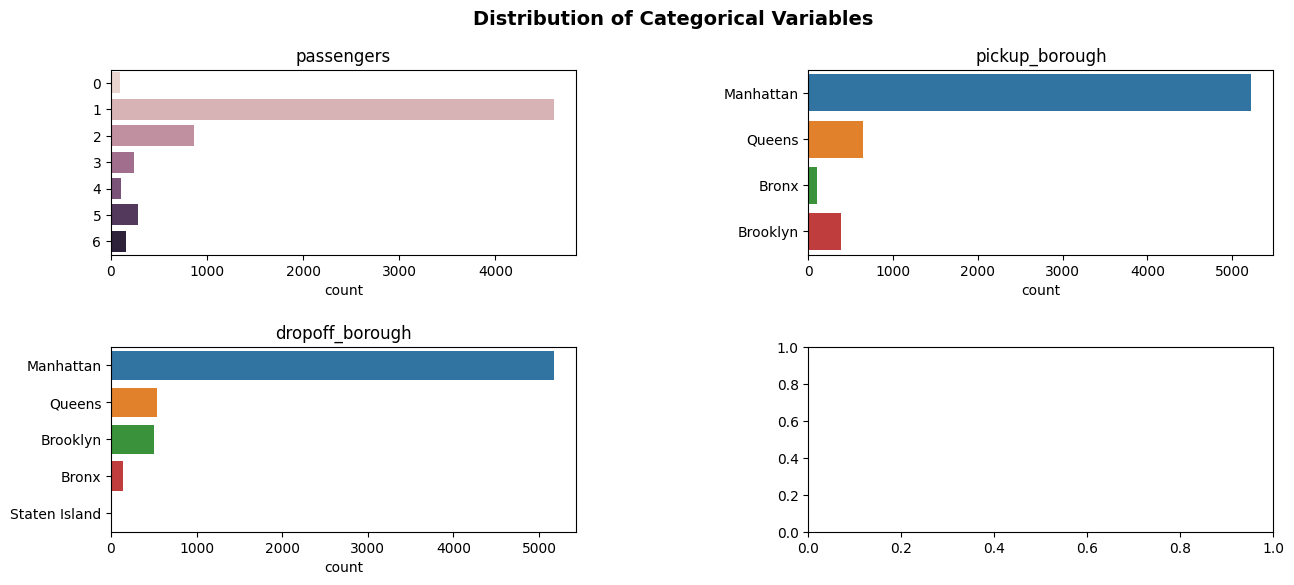

In [24]:
plot_categorical(taxi, categorical_feats, figsize=(15, 6))

Wow - I think that's our best plot yet! We see that increasing the width of our figure proportionally increases the width of our subplots.

### `super_title` and `super_title_fontsize`

Although all of our subplots are automatically titled with the categorical feature that they correspond to, we can configure our so-called "super title"! The "super title" is the overall figure title and, by default, is set to "Distribution of Categorical Variables" (through the `super_title` parameter). We can also change the font size of this super title using the `super_title_fontsize` parameter which, by default, is set to 14 pts. 

This title is accurate, but let's change it up a bit and make it bigger so that it really stands out!

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1500x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

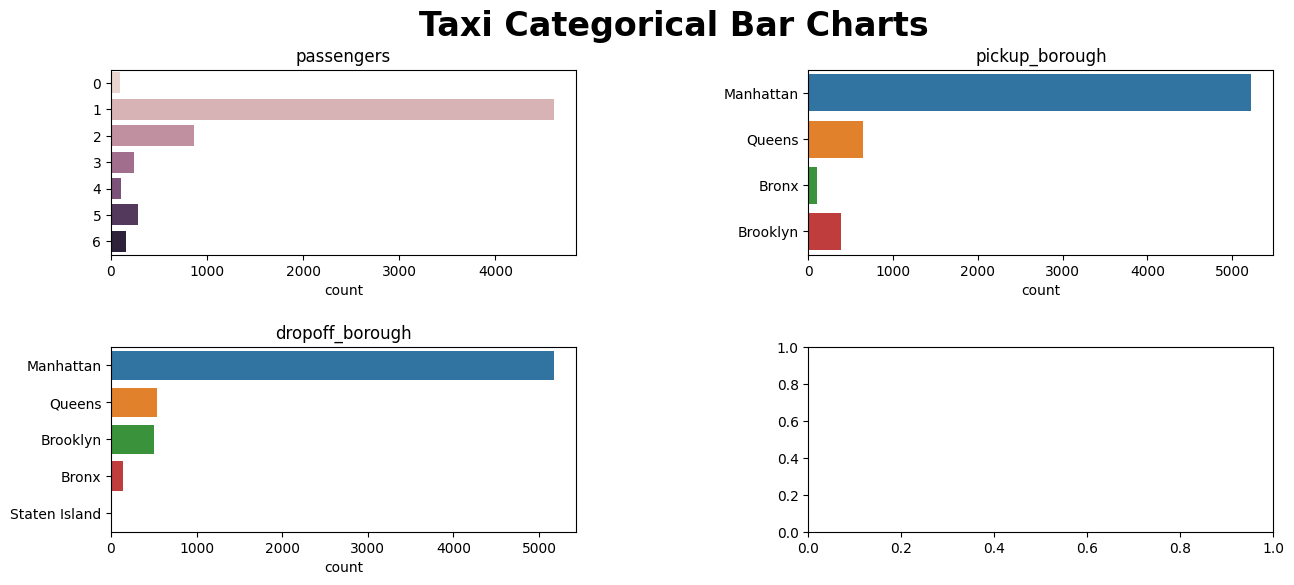

In [25]:
plot_categorical(taxi, categorical_feats, figsize=(15, 6), super_title="Taxi Categorical Bar Charts", super_title_fontsize=24)

### `output`

Now that we are happy with the configuration of our visualization, it's tme to save our figure. As described with `plot_binary`, the `output` parameter is a boolean "flag" that indicates whether the figure is to be saved (rather than just returned as a matplotlib object). The default is `False` which indicates that the figure will not be saved. We can set this `output` parameter to be `True` to save the figure to the current working directory as `categorical_variables.png`.

Only displaying plots for categorical variables with 20 or less unique values.
Dropping the following variables for plotting: pickup_zone, dropoff_zone


(<Figure size 1500x600 with 4 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='count'>,
        <Axes: title={'center': 'pickup_borough'}, xlabel='count'>,
        <Axes: title={'center': 'dropoff_borough'}, xlabel='count'>,
        <Axes: >], dtype=object))

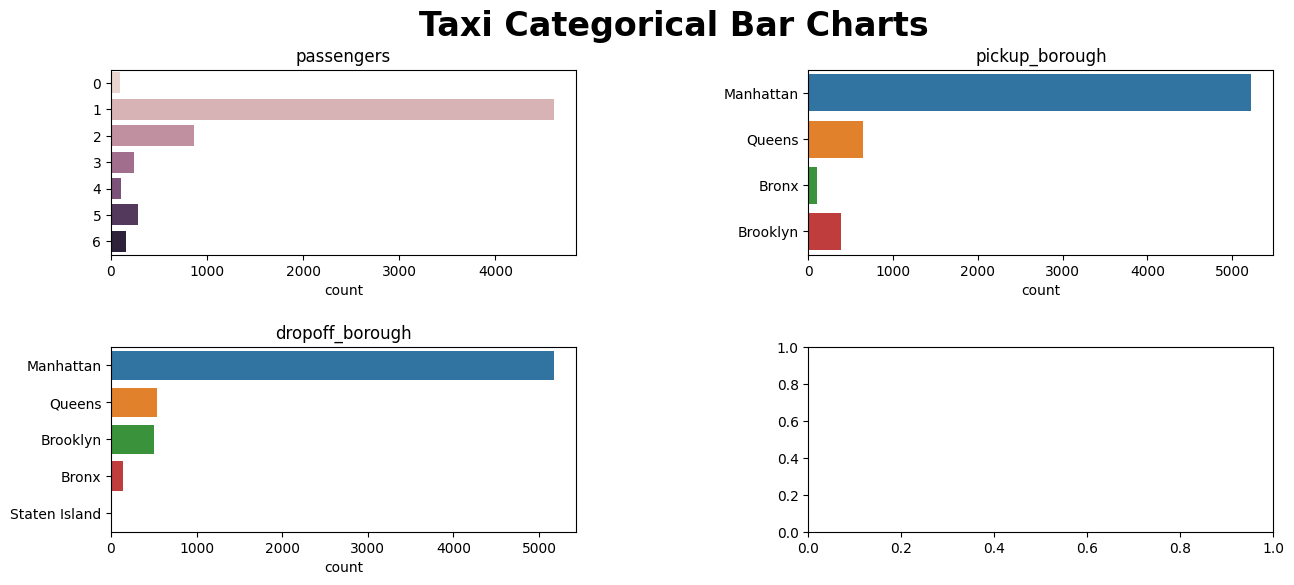

In [26]:
plot_categorical(taxi, categorical_feats, figsize=(15, 6), super_title="Taxi Categorical Bar Charts", super_title_fontsize=24, output=True)

If you run the code above, you should notice that a new `categorical_variables.png` file has been saved to your current working directory. Let's remove this figure to clean up the process.

In [27]:
os.remove("categorical_variables.png")

## Exploring numeric features

Next, we will explore the numeric features in our dataset using our plot_numeric function. Like our plot_numeric function above, this function allows us to visualize the supplied numeric features as horizontal bar plots. We will explore plot_numeric's functionality further through an example using the features in our taxi dataset.

Looking at our taxi dataset, we see that 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total' all are numeric features.

In [30]:
numeric_features = taxi.select_dtypes(include=['number']).columns.tolist()
numeric_features

['passengers', 'distance', 'fare', 'tip', 'tolls', 'total']

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

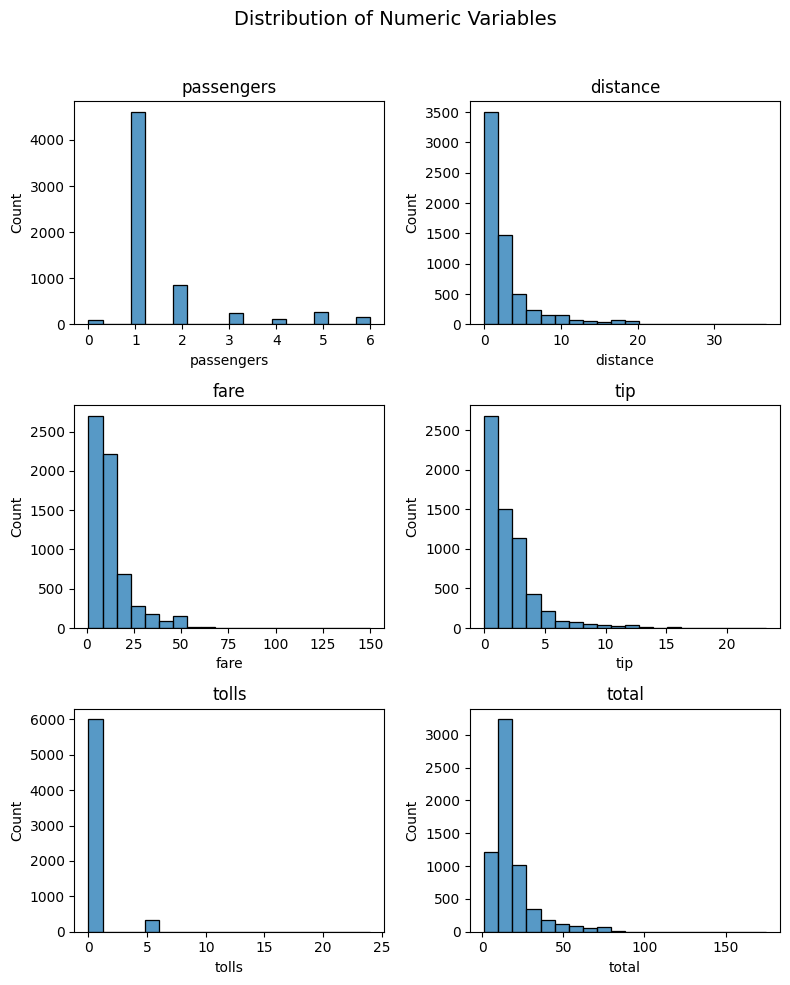

In [35]:
plot_numeric(taxi, numeric_features, 'hist')

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Density'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Density'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Density'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Density'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Density'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Density'>],
       dtype=object))

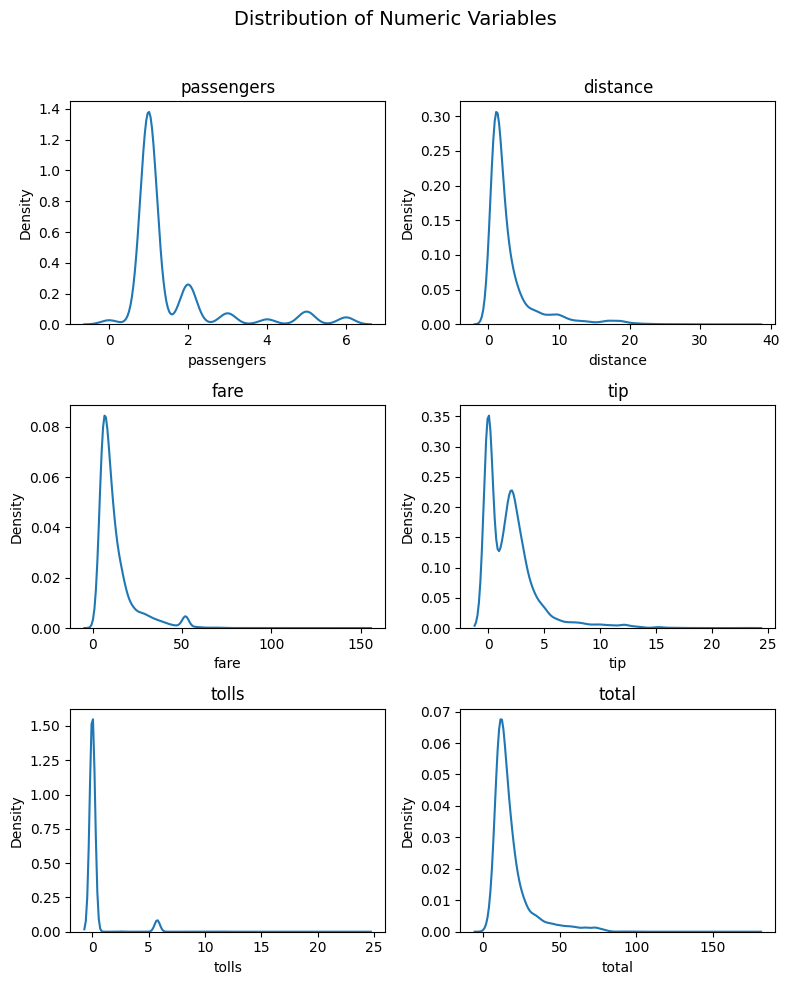

In [36]:
plot_numeric(taxi, numeric_features, 'kde')

(<Figure size 800x1000 with 6 Axes>,
 array([<Axes: title={'center': 'passengers'}, xlabel='passengers', ylabel='Count'>,
        <Axes: title={'center': 'distance'}, xlabel='distance', ylabel='Count'>,
        <Axes: title={'center': 'fare'}, xlabel='fare', ylabel='Count'>,
        <Axes: title={'center': 'tip'}, xlabel='tip', ylabel='Count'>,
        <Axes: title={'center': 'tolls'}, xlabel='tolls', ylabel='Count'>,
        <Axes: title={'center': 'total'}, xlabel='total', ylabel='Count'>],
       dtype=object))

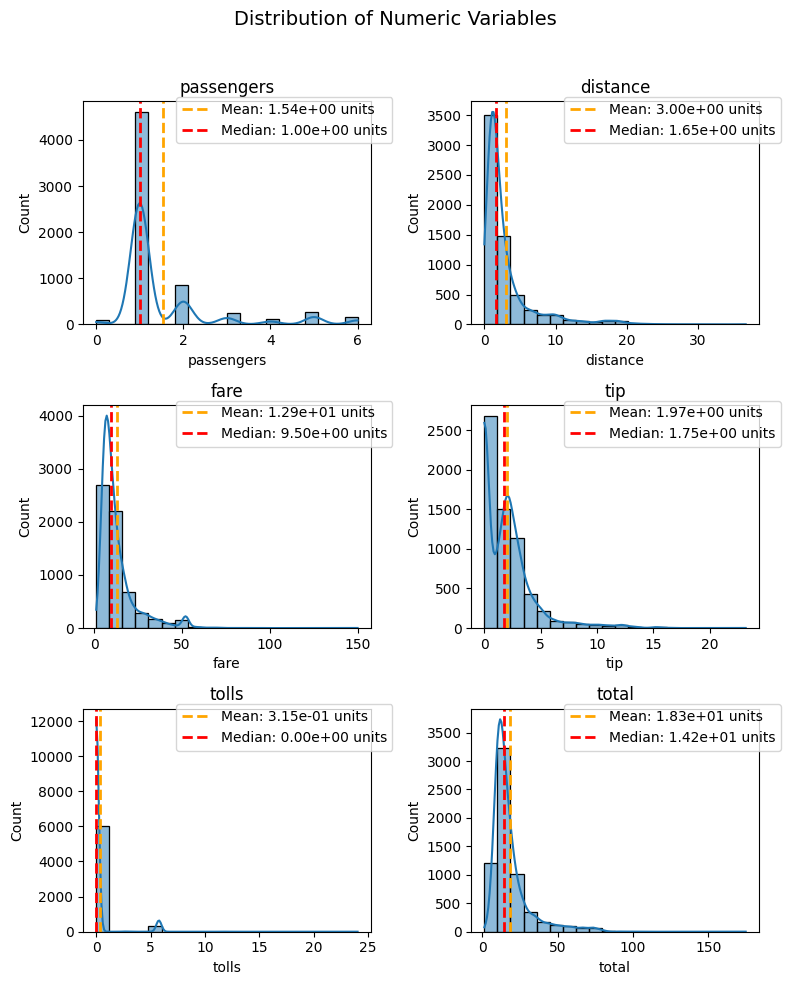

In [37]:
plot_numeric(taxi, numeric_features, 'hist+kde')